In [5]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def wrap(job,job_id,task_id):
    def singlerun(kf,phit,phi,L,run,duration,kratio1,kratio2):
        import numpy as np
        rm=0.005
        D=1.
        R=2*rm
        rng = GSLRandomNumberGenerator()
        rng.seed(run)   
        f=1.0208582         
        rv=rm*f
        td =(2*rv)**2/(6*D)   
        kd = 4*math.pi*R*D*2
        kb=kf*kd
        #kr=1/td/500
        #kub=kr/2
        kub=kb*kratio1
        kr = kub*kratio2        
        
        kon=kb*kd/(kb+kd)
        with species_attributes():
            C | {'D':str(0.0),'radius':str(rv)}
            E | {'D':str(D),'radius':str(rv)}
            S | {'D':str(D),'radius':str(rv)}
            P | {'D':str(D),'radius':str(rv)}
            ES | {'D':str(D),'radius':str(rv)}
        with reaction_rules():
            E+S ==ES | (kb,kub)
            ES > E+P | kr

        m=get_model()
        w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),rv,rng)
        w.bind_to(m)
        size=tuple(w.calculate_shape(Real3(L,L,L),rv))    
        Nev = size[0]*size[1]*size[2]
        NS=int(Nev*phit)
        NE=int(NS/10)
        #NE=int(NS/5)
        Nc=int(Nev*phi)            
        w.add_molecules(Species('C'), Nc)
        w.add_molecules(Species('S'), NS)
        w.add_molecules(Species('E'), NE)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        #duration = duration*td
        #intvl = duration/200
        obs=FixedIntervalNumberObserver(5*td,['E','S','ES','P'])
        sim.run(duration,obs)        
        #tlogs,nalog=np.array(obs.data()).T
        if run==1:
            print('kf={},phit={},phi={},L={}'.format(kf,phit,phi,L))
            print('td={:.4e},kb={:.4e},kr={:.4e},kub={:.4e},kon={:.4e},Nc={},NE={},NS={},duration={:.4e}'.format(td,kb,kr,kub,kon,Nc,NE,NS,duration))
        return obs.data()#tlogs,nalog
    job.update({'run':task_id})
    out=singlerun(**job)
    return out

def exe(jobs,simrun):    
    #res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=60,modules=('numpy','ecell4','math'))[0]
    res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=60,path='tmp',modules=('numpy','ecell4','math'),extra_args=['--exclude=ibc[02,12,27]'])[0]
    res = np.array(res)
    meanres = np.mean(res,axis=0)   
    tt=meanres.T[0]
    Ne=meanres.T[1]
    Ns=meanres.T[2]
    Nes=meanres.T[3]
    Np=meanres.T[4]
    name='/home/chew/outputdata/3DMM_kf{:.1f}krat1={:.1f}_krat2={:.3f}_phi{:.1f}phit{:.3f}L{}_NSNEratio10'.format(jobs[0]["kf"],jobs[0]["kratio1"],jobs[0]["kratio2"],jobs[0]["phi"],jobs[0]["phit"],jobs[0]["L"])
    f=open(name,'w')
    np.savetxt(name,np.column_stack([tt,Ne,Ns,Nes,Np]),delimiter=',')
    f.close()    
    print(name,len(tt))
    #plt.plot(tt,Ne,label='E')
    #plt.plot(tt,Ns,label='S')
    plt.plot(tt,Nes,label='ES')
    print('last',Ns[-1])
    #plt.plot(tt,Np,label='P'+str(jobs[0]["phi"]))
    plt.legend()

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


DEBUG:sge:Submitted batch job 2997448
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge: 2997448_[1-10%60]     debug sge-yhav     chew PD       0:00      1 (None)
DEBUG:sge:           2754893     debug job_01.s    niina  R 20-10:26:11      1 ibc01
DEBUG:sge:           2754894     debug job_08.s    niina  R 20-10:26:11      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 20-10:26:11      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 20-10:26:11      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 20-08:26:44      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 20-08:26:44      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 20-08:26:44      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 20-08:26:44      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 20-08:26:44      1 ibc06
DEBUG:sge:       

DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754893     debug job_01.s    niina  R 20-10:26:31      1 ibc01
DEBUG:sge:           2754894     debug job_08.s    niina  R 20-10:26:31      1 ibc01
DEBUG:sge:           2754895     debug job_09.s    niina  R 20-10:26:31      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 20-10:26:31      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 20-08:27:04      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 20-08:27:04      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 20-08:27:04      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 20-08:27:04      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 20-08:27:04      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 20-08:27:04      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niin

DEBUG:sge:         2997448_4     debug sge-yhav     chew  R       0:29      1 ibc01
DEBUG:sge:         2997448_5     debug sge-yhav     chew  R       0:29      1 ibc01
DEBUG:sge:         2997448_6     debug sge-yhav     chew  R       0:29      1 ibc01
DEBUG:sge:         2997448_7     debug sge-yhav     chew  R       0:29      1 ibc01
DEBUG:sge:         2997448_8     debug sge-yhav     chew  R       0:29      1 ibc01
DEBUG:sge:         2997448_9     debug sge-yhav     chew  R       0:29      1 ibc01
DEBUG:sge:        2997448_10     debug sge-yhav     chew  R       0:29      1 ibc01
DEBUG:sge:
INFO:sge:Job 2997448 must be queued, running or being transferred
INFO:sge:Waiting for jobids [2997448] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:           2754893     debug job_01.s    niina  R 20-10:26:52      1 ibc01
DEBUG:sge:           2754894     debug job_08.s    niina  R 20-10:26:52      1 ibc01
DEBUG:sge:           2

DEBUG:sge:           2765430     debug  re01.sh    niina  R 20-07:23:18      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 20-07:23:12      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 20-07:23:09      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 20-07:23:06      1 ibc19
DEBUG:sge:           2765434     debug  re16.sh    niina  R 20-07:23:06      1 ibc19
DEBUG:sge:         2997448_1     debug sge-yhav     chew  R       0:50      1 ibc01
DEBUG:sge:         2997448_2     debug sge-yhav     chew  R       0:50      1 ibc01
DEBUG:sge:         2997448_3     debug sge-yhav     chew  R       0:50      1 ibc01
DEBUG:sge:         2997448_4     debug sge-yhav     chew  R       0:50      1 ibc01
DEBUG:sge:         2997448_5     debug sge-yhav     chew  R       0:50      1 ibc01
DEBUG:sge:         2997448_6     debug sge-yhav     chew  R       0:50      1 ibc01
DEBUG:sge:         2997448_7     debug sge-yhav     chew  R       0:50 

DEBUG:sge:           2765422     debug plane_25    niina  R 20-07:57:21      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 20-07:57:21      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 20-07:57:21      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 20-07:57:21      1 ibc19
DEBUG:sge:           2765426     debug plane_29    niina  R 20-07:57:21      1 ibc19
DEBUG:sge:           2765427     debug plane_30    niina  R 20-07:57:21      1 ibc19
DEBUG:sge:           2765428     debug plane_31    niina  R 20-07:57:21      1 ibc19
DEBUG:sge:           2765429     debug plane_32    niina  R 20-07:57:21      1 ibc19
DEBUG:sge:           2765430     debug  re01.sh    niina  R 20-07:23:38      1 ibc19
DEBUG:sge:           2765431     debug  re08.sh    niina  R 20-07:23:32      1 ibc19
DEBUG:sge:           2765432     debug  re09.sh    niina  R 20-07:23:29      1 ibc19
DEBUG:sge:           2765433     debug  re14.sh    niina  R 20-07

DEBUG:sge:           2765414     debug plane_17    niina  R 20-07:57:42      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 20-07:57:42      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 20-07:57:42      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 20-07:57:42      1 ibc18
DEBUG:sge:           2765418     debug plane_21    niina  R 20-07:57:42      1 ibc18
DEBUG:sge:           2765419     debug plane_22    niina  R 20-07:57:42      1 ibc18
DEBUG:sge:           2765420     debug plane_23    niina  R 20-07:57:42      1 ibc18
DEBUG:sge:           2765421     debug plane_24    niina  R 20-07:57:41      1 ibc18
DEBUG:sge:           2765422     debug plane_25    niina  R 20-07:57:41      1 ibc18
DEBUG:sge:           2765423     debug plane_26    niina  R 20-07:57:41      1 ibc19
DEBUG:sge:           2765424     debug plane_27    niina  R 20-07:57:41      1 ibc19
DEBUG:sge:           2765425     debug plane_28    niina  R 20-07

DEBUG:sge:           2762405     debug plane_08    niina  R 20-08:28:35      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 20-08:28:35      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 20-08:28:35      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 20-08:28:35      1 ibc18
DEBUG:sge:           2762409     debug plane_12    niina  R 20-08:28:35      1 ibc18
DEBUG:sge:           2762411     debug plane_14    niina  R 20-08:28:35      1 ibc18
DEBUG:sge:           2762412     debug plane_15    niina  R 20-08:28:35      1 ibc18
DEBUG:sge:           2762413     debug plane_16    niina  R 20-08:28:35      1 ibc17
DEBUG:sge:           2765414     debug plane_17    niina  R 20-07:58:02      1 ibc18
DEBUG:sge:           2765415     debug plane_18    niina  R 20-07:58:02      1 ibc18
DEBUG:sge:           2765416     debug plane_19    niina  R 20-07:58:02      1 ibc18
DEBUG:sge:           2765417     debug plane_20    niina  R 20-07

DEBUG:sge:           2754897     debug job_16.s    niina  R 20-10:28:22      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 20-08:28:55      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 20-08:28:55      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 20-08:28:55      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 20-08:28:55      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 20-08:28:55      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 20-08:28:55      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 20-08:28:55      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 20-08:28:55      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 20-08:28:55      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 20-08:28:55      1 ibc18
DEBUG:sge:           2762408     debug plane_11    niina  R 20-08

DEBUG:sge:           2754895     debug job_09.s    niina  R 20-10:28:42      1 ibc01
DEBUG:sge:           2754897     debug job_16.s    niina  R 20-10:28:42      1 ibc01
DEBUG:sge:           2762398     debug plane_01    niina  R 20-08:29:15      1 ibc04
DEBUG:sge:           2762399     debug plane_02    niina  R 20-08:29:15      1 ibc04
DEBUG:sge:           2762400     debug plane_03    niina  R 20-08:29:15      1 ibc06
DEBUG:sge:           2762401     debug plane_04    niina  R 20-08:29:15      1 ibc06
DEBUG:sge:           2762402     debug plane_05    niina  R 20-08:29:15      1 ibc06
DEBUG:sge:           2762403     debug plane_06    niina  R 20-08:29:15      1 ibc19
DEBUG:sge:           2762404     debug plane_07    niina  R 20-08:29:15      1 ibc19
DEBUG:sge:           2762405     debug plane_08    niina  R 20-08:29:15      1 ibc19
DEBUG:sge:           2762406     debug plane_09    niina  R 20-08:29:15      1 ibc18
DEBUG:sge:           2762407     debug plane_10    niina  R 20-08

kf=10.0,phit=0.01,phi=0.0,L=0.5
td=1.7369e-05,kb=2.5133e+00,kr=2.5133e+01,kub=2.5133e+03,kon=2.2848e-01,Nc=0,NE=179,NS=1798,duration=5.0000e-01
/home/chew/outputdata/3DMM_kf10.0krat1=1000.0_krat2=0.010_phi0.0phit0.010L0.5_NSNEratio10 5758
last 54.2


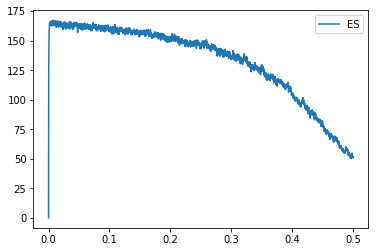

In [10]:
kf=10.
kratio=1000.
kratio2 = 0.01
phit=0.01
L=0.5
dur=0.5
simrun=10#0#0#1000
phis=[0.0]
for phi in phis:
    jobs = [{'kf':kf,'kratio1':kratio,'kratio2':kratio2,'phit':phit,'phi':phi,'L':L,'duration':dur}]
    exe(jobs,simrun)
